# Lab 4 – Grammars and parsing

In [5]:
import nltk, re, random
from nltk.corpus import brown

## Exercise 1 - Introduction to chunking
1. Make your own noun phrase (NP) chunker, detecting noun phrases and a clause, for which verbs
(VB) are followed by a preposition (IN) and/or a noun phrase. This requires you to define grammar
and a regex based chunk parser.
2. Convert a POS tagged text to a list of tuples, where each tuple consists of a verb followed by a
sequence of noun phrases and prepositions (i.e., the clause above) Example: “the little cat sat on
the mat” becomes (‘sat’, ‘on’, ‘NP’) . . .
3. Using the pre-annotated test set from wall street journal data (conll2000 in nltk), experiment with
different grammars to get the highest possible F-measure. There is no evaluation of this task, but
rather a motivator to learn something about grammars.

In [48]:
# the following can be of use when identifying tags:
# nltk.help.upenn_tagset()

Let's use the familiar brown corpus to begin with. Get the POS-tagged sentences.

In [49]:
sents = brown.tagged_sents() # TODO: tagged sentences from the brown corpus

# Exercise 1 - Introduction to chunking

## 1a)
Make your own noun phrase (NP) chunker, detecting noun phrases and a clause, for which verbs (VB) are followed by a preposition (IN) and/or a noun phrase.

In [50]:
grammar =  r"""
  NP: {<AT|DT|PP\$>?<JJ>*<NN>}   # chunk article</determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""

# TODO: set up a parser using the grammar you defined
chunk_parser = nltk.RegexpParser(grammar)

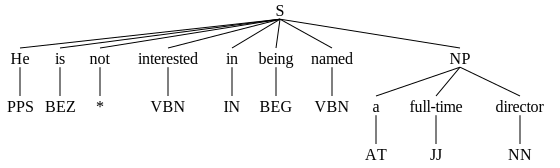

In [51]:
# test your parser!
test_sentence = sents[400][:10]  # just an example sentence, using the first 10 words
chunks = chunk_parser.parse(test_sentence)
chunks

In [52]:
print(chunks)

(S
  He/PPS
  is/BEZ
  not/*
  interested/VBN
  in/IN
  being/BEG
  named/VBN
  (NP a/AT full-time/JJ director/NN))


## 1b)
Convert a POS tagged text to a list of tuples, where each tuple consists of a verb followed by a sequence of noun phrases and prepositions.
Example: “the little cat sat on the mat” becomes (‘sat’, ‘on’, ‘NP’) . . . 

In [53]:
 grammar =  r"""
        NP: {<AT|DT|PP\$>?<JJ>*<NN>}   # chunk article</determiner/possessive, adjectives and noun
            {<NNP>+}                # chunk sequences of proper nouns
        VP: {<VB.*><IN><NP>}   # chunk verb followed by preposition and noun phrases
    """
chunk_parser = nltk.RegexpParser(grammar)
def chunks_to_verb_NP_tuples(tagged_sents):
    tuples = set()
    """
    iterate the trees and subtrees of your parser.
    add all chunks starting with a verb (CLAUSE) to the set of tuples
    """
    for subtree in tagged_sents:
        if type(subtree) == nltk.tree.Tree:
            if subtree.label() == 'VP':
                for e in subtree:
                    if type(e) == nltk.tree.Tree:
                        tuples.add((subtree[0][0], subtree[1][0], e.label()))
            else:
                chunks_to_verb_NP_tuples(subtree)
            
            
    
    return list(tuples)

test_sentence = sents[1][:10]  # just an example sentence, using the first 10 words
chunks = chunk_parser.parse(test_sentence)
print(chunks)
print(chunks_to_verb_NP_tuples(chunks))

(S
  (NP The/AT jury/NN)
  further/RBR
  (VP said/VBD in/IN (NP term-end/NN))
  presentments/NNS
  that/CS
  the/AT
  City/NN-TL)
[('said', 'in', 'NP')]


In [54]:
# check your output :-)
vb_np = chunks_to_verb_NP_tuples(sents)
random.shuffle(vb_np)
print(vb_np)

""" for i in range(1, 100):
    sent = nltk.corpus.brown.tagged_sents()[i]
    trees = chunk_parser.parse(sent)
    print(chunks_to_verb_NP_tuples(trees)) """


[]


' for i in range(1, 100):\n    sent = nltk.corpus.brown.tagged_sents()[i]\n    trees = chunk_parser.parse(sent)\n    print(chunks_to_verb_NP_tuples(trees)) '

## 1c)
Using the pre-annotated test set from wall street journal data (conll2000 in nltk), experiment with different grammars to get the highest possible F-measure. There is no evaluation of this task, but rather a motivator to learn something about grammars.

In [55]:
#nltk.download('conll2000')
#using different grammars from https://www.nltk.org/book/ch07.html
wsj = nltk.corpus.conll2000
test_sents = wsj.chunked_sents('test.txt', chunk_types=['NP'])

grammar_1 =  r"""
        NP: {<AT|DT|PP\$>?<JJ>*<NN>}   # chunk article</determiner/possessive, adjectives and noun
            {<NNP>+}                # chunk sequences of proper nouns
    """

grammar_2 = r"""NP: {<[CDJNP].*>+}""" #tags beginning with letters that are characteristic of noun phrase tags 

grammar_3 =  r"""
        NP: {<DT>?<JJ>*<NN>}              # chunk sequences of proper nouns
    """

cp1 = nltk.RegexpParser(grammar_1)
cp2 = nltk.RegexpParser(grammar_2)
cp3 = nltk.RegexpParser(grammar_3)
print(cp1.accuracy(test_sents))
print(cp2.accuracy(test_sents))
print(cp3.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  67.7%%
    Precision:     48.1%%
    Recall:        37.4%%
    F-Measure:     42.1%%
ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%
ChunkParse score:
    IOB Accuracy:  59.7%%
    Precision:     45.3%%
    Recall:        24.2%%
    F-Measure:     31.6%%


# Exercise 2 - Making use of chunks

## 2a)
With the following grammar rules:
```
1. proper noun singular
2. determiner followed by an adjective, followed by any noun
3. two consecutive nouns
```
Create a `RegexpParser` chunker

In [56]:
grammar = r"""
    NP: {<NP>}   # proper noun singular
        {<DT.*><JJ><N.*>} #determiner followed by an adjective, followed by any noun
        {<N.*>{2}} #two consecutive nouns
"""
# TODO: set up a parser using the grammar you defined
chunk_parser = nltk.RegexpParser(grammar)

## 2b)

Read the file `starlink.txt` and perform the following operations on the text:
- sentence tokenize
- word tokenize
- pos tag

In [57]:
import os

"""
TODO:
- read the file "starlink.txt"
- tokenize and tag the words of each sentence
"""
def get_pos_tags_from_file(filename):
    with open(filename, 'r') as reader:
        starlink = reader.read().splitlines()

    sentence = [nltk.sent_tokenize(sentence) for sentence in starlink]
    sentence = [ele for ele in sentence if ele != []] # removing empty lists
    words_tokenized = [nltk.word_tokenize(word) for sent in sentence for word in sent]
    """     
    words=[]
    for sent in sentence:
        for word in sent:
            words.append(nltk.word_tokenize(word)) 
    """
    tagged_words = [nltk.pos_tag(word) for word in words_tokenized]
    return tagged_words
    
starlink_tagged = get_pos_tags_from_file("data/starlink.txt")
starlink_tagged[5][:10]


[('The', 'DT'),
 ('launch', 'NN'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('seventh', 'JJ'),
 ('Falcon', 'NNP'),
 ('9', 'CD'),
 ('mission', 'NN'),
 ('this', 'DT'),
 ('year', 'NN')]

In [58]:
def chunks_to_verb_NP_tuples(tagged_sents):
    tuples = set()
    """
    iterate the trees and subtrees of your parser.
    add all chunks starting with a verb (CLAUSE) to the set of tuples
    """
    for subtree in tagged_sents:
        if type(subtree) == nltk.tree.Tree:
            if subtree.label() == 'VP':
                for e in subtree:
                    if type(e) == nltk.tree.Tree:
                        tuples.add((subtree[0][0], subtree[1][0], e.label()))
            else:
                chunks_to_verb_NP_tuples(subtree)
            
            
    
    return list(tuples)

In [59]:
""" 
grammar = "NP: {<DT.*><JJ>+<NN>+}" 
cp = nltk.RegexpParser(grammar)
parsed_sents = [cp.parse(sent) for sent in starlink_tagged]
for sent in parsed_sents:
    for subtree in sent:
        if type(subtree) == nltk.tree.Tree:
            if subtree.label() == 'NP':
                print(subtree[0][0] + ' ' + subtree[1][0] + ' ' + subtree[2][0] )
            else:
                get_descriptive_nouns(subtree) """

' \ngrammar = "NP: {<DT.*><JJ>+<NN>+}" \ncp = nltk.RegexpParser(grammar)\nparsed_sents = [cp.parse(sent) for sent in starlink_tagged]\nfor sent in parsed_sents:\n    for subtree in sent:\n        if type(subtree) == nltk.tree.Tree:\n            if subtree.label() == \'NP\':\n                print(subtree[0][0] + \' \' + subtree[1][0] + \' \' + subtree[2][0] )\n            else:\n                get_descriptive_nouns(subtree) '

## 2c)
From all found subtrees in the text, print out the text from all the leaves on the form of `DT -> JJ -> NN` (i.e. the CONSECUTIVE chunk you defined above)

In [60]:
"""
TODO:
write a function to retrieve the DT-JJ-NN sequences
from the grammar you defined in 2a)
"""
def get_descriptive_nouns(tagged_sents):
    grammar = "NP: {<DT.*><JJ>+<NN.*>+}" 
    cp = nltk.RegexpParser(grammar)
    parsed_sents = [cp.parse(sent) for sent in tagged_sents]
    print(len(parsed_sents))
    for sent in parsed_sents:
        for subtree in sent:
            if type(subtree) == nltk.tree.Tree:
                if subtree.label() == 'NP':
                    print(subtree[0][0] + ' ' + subtree[1][0] + ' ' + subtree[2][0] )
                else:
                    get_descriptive_nouns(subtree)
    pass


get_descriptive_nouns(starlink_tagged)

16
a one-day delay
a successful deployment
the seventh Falcon
the fourth Starlink
the other launches
a classified payload
the first launch
a solar storm
a different approach
The previous launch
a single burn
the upper stage
a second burn
a near circular
the atmospheric drag
the previous set


## 2d)
Create a custom rule for a combination of 3 or more tags, similarly to task c).

Do you see any practical uses for chunking with this rule, or in general?

In [61]:
def get_noun_followed_by_num(tagged_sents):
    grammar = "NUM: {<N.*>+<CD>+}" 
    cp = nltk.RegexpParser(grammar)
    parsed_sents = [cp.parse(sent) for sent in tagged_sents]
    for sent in parsed_sents:
        for subtree in sent:
            if type(subtree) == nltk.tree.Tree:
                if subtree.label() == 'NUM':
                    print(subtree)
                else:
                    get_noun_followed_by_num(subtree)
    

get_noun_followed_by_num(starlink_tagged)



(NUM Falcon/NNP 9/CD)
(NUM Space/NNP Launch/NNP Complex/NNP 40/CD)
(NUM Falcon/NNP 9/CD)
(NUM Falcon/NNP 9/CD)
(NUM Feb./NNP 3/CD)
(NUM Feb./NNP 25/CD)
(NUM Falcon/NNP 9/CD)


# Exercise 3 - Context-free grammar (CFG)

## 3a)
Create a cfg to handle sentences such as "she is programming", "they are coding" (look at the word forms and POS). The first verb should only handle present tense, while the second verb is flexible. Note that you need to specify the accepted words.

In [62]:
cfg = nltk.CFG.fromstring("""
  S -> PPS VP | PPSS VP
  VP -> V NP 
  V -> "is" | "are" 
  NP -> N
  N -> "programming" | "coding" 
  PPS -> "She"
  PPSS -> "they"
  """)
cfg.productions()

[S -> PPS VP,
 S -> PPSS VP,
 VP -> V NP,
 V -> 'is',
 V -> 'are',
 NP -> N,
 N -> 'programming',
 N -> 'coding',
 PPS -> 'She',
 PPSS -> 'they']

#### A little function to visualize some possible outputs of the grammar
#### Do not change this

In [63]:
def generate_sample(grammar, start, tokens):        
    # iterate left hand and right hand side of the tree
    if start in grammar._lhs_index:
        derivation = random.choice(grammar._lhs_index[start])            
        for rhs in derivation._rhs:          
            generate_sample(grammar, rhs, tokens)
    elif start in grammar._rhs_index:
        tokens.append(str(start))
    return tokens

for _ in range(10):
    print(generate_sample(cfg, cfg.start(), []))

['they', 'are', 'coding']
['they', 'is', 'coding']
['She', 'are', 'coding']
['they', 'is', 'coding']
['they', 'are', 'coding']
['they', 'are', 'coding']
['they', 'is', 'coding']
['She', 'are', 'programming']
['they', 'is', 'programming']
['She', 'is', 'coding']


## 3b)
Find some problems with the above CFG, any ideas how you would improve the results?

There are always some problems, either with the concordance of pronoun - verb, like above or other issues. 
I would improve results by making very specific rules.

## 3c)
Initialize a `ChartParser` with the cfg from 3a).

Write a function to retrieve words not defined by your grammar.

In [64]:
cfg_parser = nltk.ChartParser(cfg) # TODO chartparser of cfg grammar above

"""
TODO
write a function that returns a list of missing tokens (not covered by your cfg)
Look up "lexical index" of a grammar.
"""
def get_missing_words(grammar, tokens):
    missing = [token for token in tokens if not grammar._lexical_index.get(token)]
    return missing

#from https://stackoverflow.com/questions/46454542/how-do-i-get-the-words-that-are-not-in-the-lexicon-of-a-cfg-grammar

In [65]:
#[fn for fn in dir(cfg) if "lexical" in fn]

Finish the below function

In [66]:
def parse(parser, cfg_grammar, sent):
    tokens = sent.split() # TODO word tokens
    missing = get_missing_words(cfg_grammar, tokens)
    if missing:
        print("Grammar does not cover: {}".format(missing))
        return
    trees = [tree for tree in cfg_parser.parse(tokens) ] # TODO: a list of parsed tokens
    for tree in trees:
        print(tree)
    if len(trees) > 0:
        return trees[0]
    else:
        print("Ungrammatical sentence.")

## 3d)
output the tree of your parser for the sentence "they are programming"

(S (PPSS they) (VP (V are) (NP (N programming))))


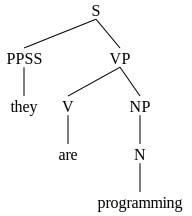

In [67]:
txt = "they are programming"
parse(cfg_parser, cfg, txt)

# Exercise 4 - Tweet like Trump! Now that he's banned
Using the provided file "realDonaldTrump.json", you will build a language model to generate Trump-esque tweets using n-grams.

Hint: make use of "padded_everygram_pipeline" supported in nltk.lm. This creates all ngrams up to the specified N-parameter with padding:

Example:
```
('<s>',)
('<s>', '<s>')
('<s>', '<s>', '<s>')
('<s>', '<s>', '<s>', '<s>')
('<s>', '<s>', '<s>', '<s>', 'i')
('<s>',)
('<s>', '<s>')
('<s>', '<s>', '<s>')
('<s>', '<s>', '<s>', 'i')
('<s>', '<s>', '<s>', 'i', 'am')
('<s>',)
('<s>', '<s>')
('<s>', '<s>', 'i')
('<s>', '<s>', 'i', 'am')
('<s>', '<s>', 'i', 'am', 'asking')
('<s>',)
('<s>', 'i')
('<s>', 'i', 'am')
('<s>', 'i', 'am', 'asking')
('<s>', 'i', 'am', 'asking', 'for')
('i',)
('i', 'am')
('i', 'am', 'asking')
('i', 'am', 'asking', 'for')
('i', 'am', 'asking', 'for', 'everyone')
```

In [1]:
import json
import pickle
import os
# TODO imports for nltk n-gram modeling and LM
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

Load the JSON data and store the texts:

In [2]:
with open("data/realDonaldTrump.json", encoding='UTF-8') as fp:
    tweets = json.load(fp)

texts = list(map(lambda x: x.get("text"), tweets))
texts[:2]

['https://t.co/Pm2PKV0Fp3',
 'I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; Order – respect the Law and our great men and women in Blue. Thank you!']

In [3]:
# let's use this path to store our model after training, so it's easier to reuse later :)
pickle_path = "model.pkl"

Finish the `train_model` function.

In [15]:
def train_model(data):
    tokenized = [list(map(str.lower, nltk.TweetTokenizer().tokenize(sent))) for sent in data]
    #tokenized = [nltk.word_tokenize(sent) for sent in data ]  # TODO: use a tokenizer for the twitter data
    n = 5 # TODO find an appropriate N-gram 
    train_data, padded_vocab = padded_everygram_pipeline(n, tokenized)  # TODO: padded everygram
    # 
    model = MLE(2) # TODO: from nltk.lm (language model), use an appropriate estimator
    model.fit(train_data, padded_vocab)
    # save the model if you want to :-) then we can load it in the next step without retraining!
    with open(pickle_path, "wb") as fp:
        pickle.dump(model, fp)
    return model

In [16]:
""" if os.path.exists(pickle_path):
    with open(pickle_path, "rb") as fp:
        model = pickle.load(fp)
else: """
model = train_model(texts)

In [17]:
def generate_sentence(model, txt):
    txt = nltk.word_tokenize(txt)  # TODO: tokenize the input
    while True:
        next_word = model.generate(text_seed=txt, random_seed=42)
        if next_word == '</s>':
            break
        txt.append(next_word)
        
    def filter_fn(txt):
        no_http = "http" not in txt
        some_other_rule = True
        
        return no_http or some_other_rule
    
    return " ".join([t for t in txt if filter_fn(t)])

In [ ]:
#this takes ages to run, I let it run for 120 min once, and it still wasn't done
generate_sentence(model, "some sentence")

## 4b)
Create a grammar to chunk some typical trump statements.

There are multiple approaches to this. One way would be to use your own input to the model and look at the resulting outputs and their POS tags. Another possible approach is to use the training data to group together e.g. 5-grams of POS tags to look at the most frequently occurring POS tag groupings. The aim is to have a chunker that groups utterances like "so sad", "make america great again!" and so forth.

PS: Cannot do this part, since the generate fn does not work
Show your results using the outputs from your model with these inputs: 
- "clinton will"
- "obama is"
- "build a"
- "so sad"

In [ ]:
""" trump_pos_sents = [nltk.pos_tag(nltk.word_tokenize(text)) for text in texts[:30]]
for el in trump_pos_sents:
    for  (word, pos) in el:
        if pos == "RB":
            print(el)
            print()
 """

In [6]:
trump_grammar = r"""
    NP: {<NP>}   # proper noun singular
        {<DT.*><JJ><N.*>} #determiner followed by an adjective, followed by any noun
        {<N.*>+} #two consecutive nouns
        {PRP} # personal pronoun
        {<NN.*><IN><PRP>}
    AdvP: {<RB><NP>} #adverbial phrase
    VP: {<VB.*> <AdvP|NP>} #verb followed by an np
"""
trump_parser = nltk.RegexpParser(trump_grammar)

In [7]:
filter_texts = [] # filter out texts that include website reference, to get cleaner results
for text in texts:
    if "http" not in text:
        filter_texts.append(text)

print(len(filter_texts))
print(filter_texts[93])

40560
Finished off the year with the highest Stock Market in history. Setting records with your 401k’s, just like I said you would. Congratulations to all!


In [11]:
sents_with_grammar=0
for text in filter_texts:
    try:
        trump_parser.parse(nltk.pos_tag(nltk.word_tokenize(text)))
        sents_with_grammar+=1
    except:
        continue

tot = len(filter_texts)
print("percent of texts that include grammar is:")
print()
print(sents_with_grammar*100/tot)


percent of texts that include grammar is:

28.71301775147929


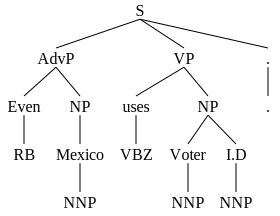

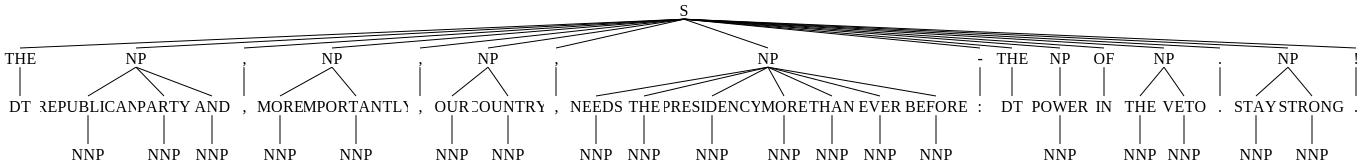

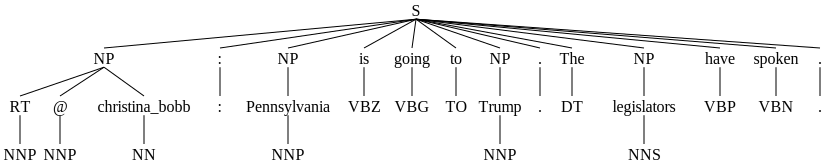

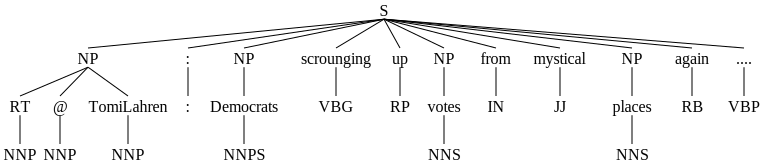

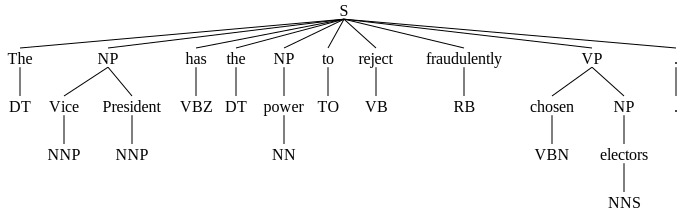

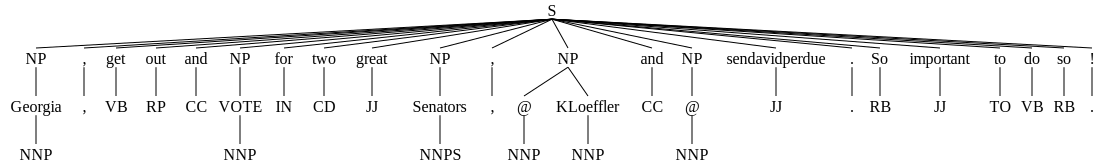

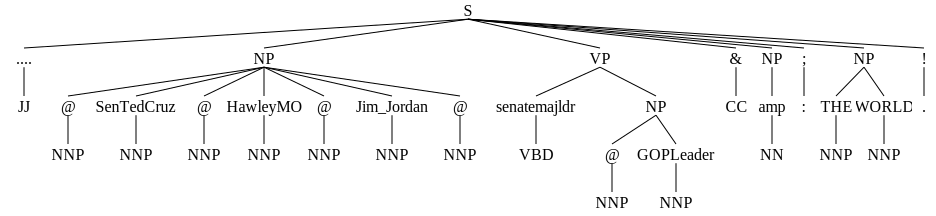

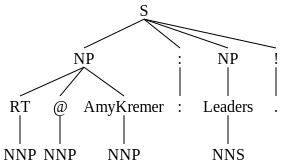

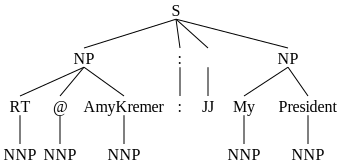

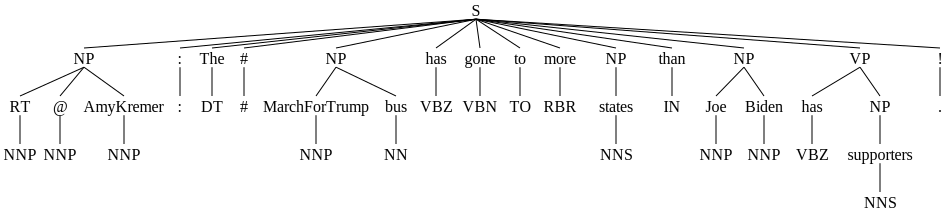

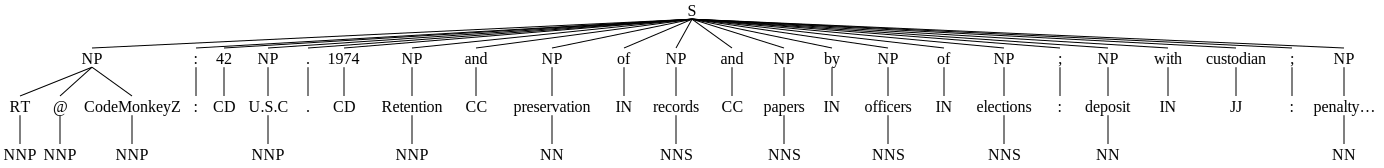

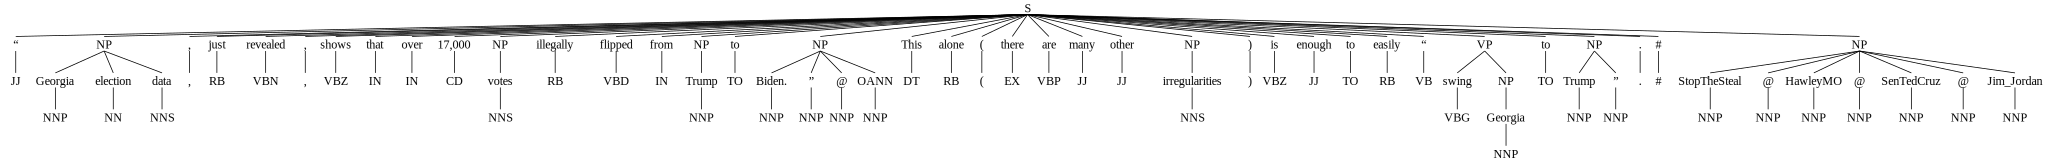

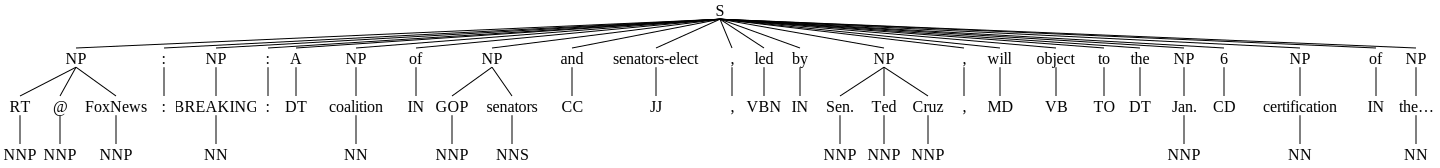

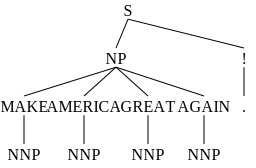

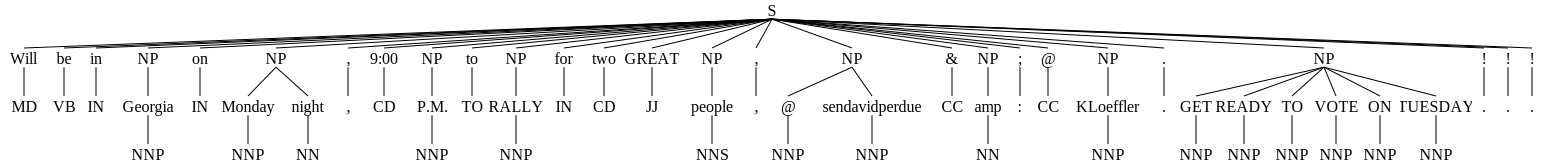

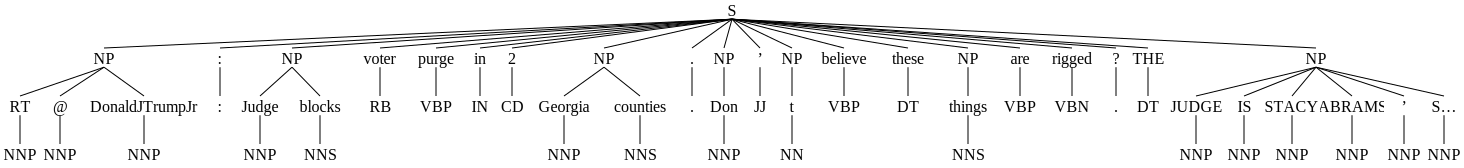

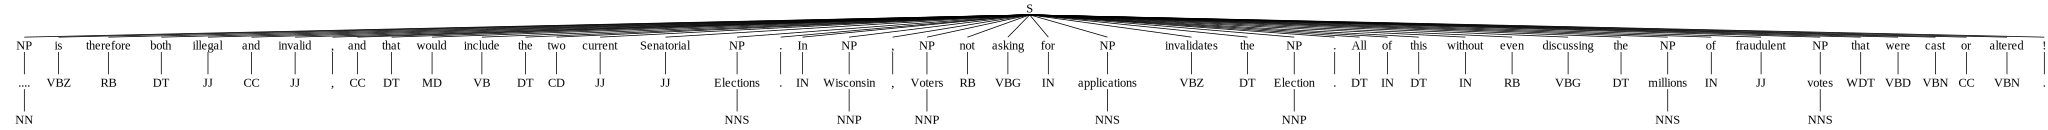

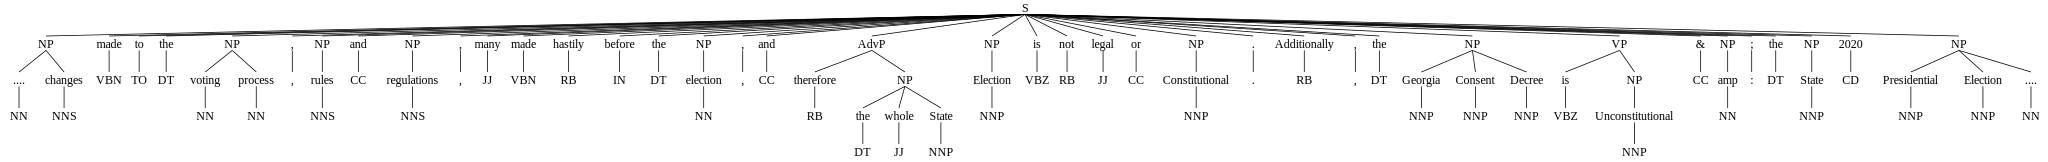

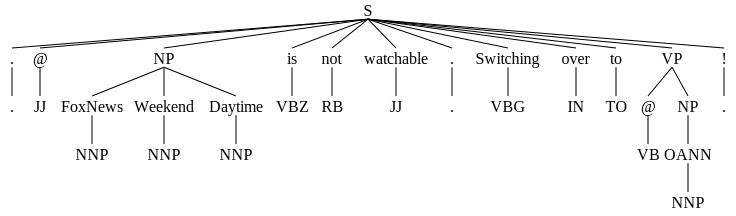

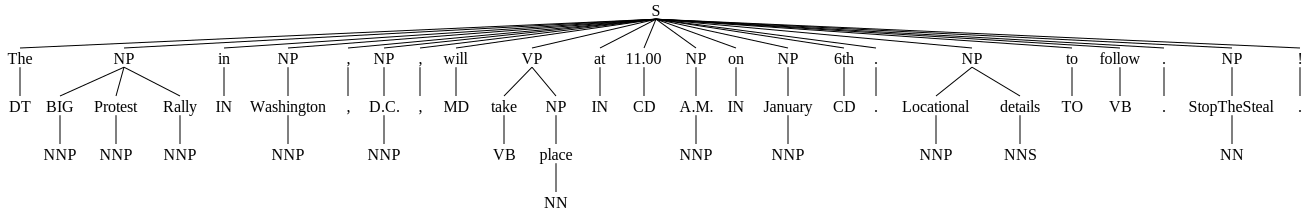

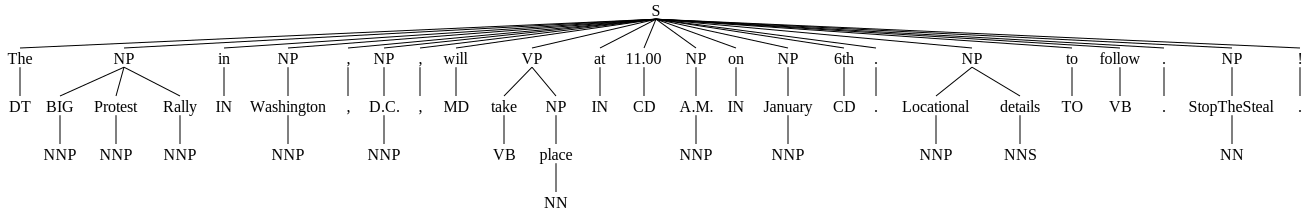

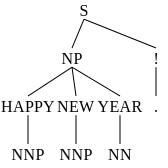

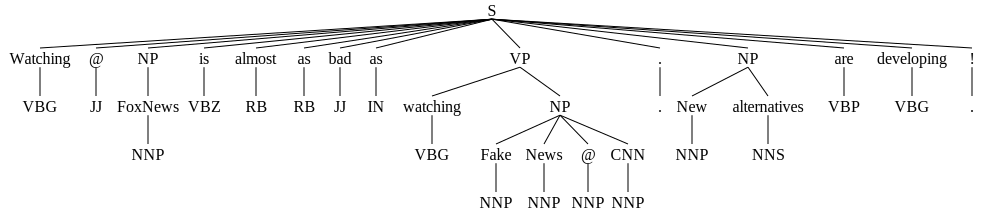

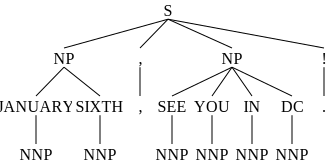

In [12]:
from IPython.display import display

for text in filter_texts[:100]:
    try:
        res = (trump_parser.parse(nltk.pos_tag(nltk.word_tokenize(text))))
        display(res)
    except:
        continue